<a href="https://colab.research.google.com/github/NightPrinceY/Whisper-MAY/blob/main/ASR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd
from io import BytesIO


zip_path =  '/content/drive/MyDrive/AIC/MTC-ASR-Dataset-16K.zip'
file_name = 'train.csv'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:

    if file_name in zip_ref.namelist():

        with zip_ref.open(file_name) as file:

            data = pd.read_csv(file)

print(data.head())

            audio                                         transcript
0  train_sample_0  على إنها عار في الوقت اللي كانت بتتعامل مع أخو...
1  train_sample_1  فأكيد ربنا عوضهم خير هو الراجل بيبقى ليه إختيا...
2  train_sample_2  زي دول كتيره بنشوفها النهارده في العالم وأصبحت...
3  train_sample_3  يعني مين اللي بيحط شروطها يعني أنا شايفه إني م...
4  train_sample_4  والله هي الموضوع مش كليب خلي بالك ولا أغنيه ال...


In [ ]:
data.isnull().sum()

audio         0
transcript    6
dtype: int64

In [ ]:
data[data.isnull().any(axis = 1)]

,audio,transcript
2047,train_sample_2047,NaN
7697,train_sample_7697,NaN
13717,train_sample_13717,NaN
24389,train_sample_24389,NaN
31478,train_sample_31478,NaN
34484,train_sample_34484,NaN


In [ ]:
import pandas as pd
import re

data =  data
# Define preprocessing functions
def remove_diacritics(text):
    arabic_diacritics = re.compile(r'[\u064B-\u0652]')
    text = re.sub(arabic_diacritics, '', text)
    return text
def normalize_characters(text):
    normalization_dict = {
        'أ': 'ا', 'إ': 'ا', 'آ': 'ا',
        'ى': 'ي', 'ئ': 'ي', 'ؤ': 'و'
    }
    for char, normalized_char in normalization_dict.items():
        text = text.replace(char, normalized_char)
    return text
def expand_abbreviations(text):
    abbreviations_dict = {

        'إد.': 'إدارة',
        'م.': 'مهندس'

    }
    for abbr, expansion in abbreviations_dict.items():
        text = text.replace(abbr, expansion)
    return text
def preprocess_text(text):
    text = str(text).lower()
    text = remove_diacritics(text)
    text = normalize_characters(text)
    text = expand_abbreviations(text)
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)  # keep only arabic characters
    text = re.sub(r'\s+', ' ', text).strip()  # femove extra spaces
    return text
data['transcript'] = data['transcript'].apply(preprocess_text)


cleaned_file_path = './cleaned_train2.csv'
data.to_csv(cleaned_file_path, index=False)

cleaned_file_path

'./cleaned_train2.csv'

In [ ]:
df = pd.read_csv('./cleaned_train2.csv')

In [ ]:
df.isnull().sum()

audio          0
transcript    13
dtype: int64

In [ ]:
x = df[df.isnull().any(axis = 1)]
x

,audio,transcript
2047,train_sample_2047,NaN
7697,train_sample_7697,NaN
13717,train_sample_13717,NaN
19463,train_sample_19463,NaN
21351,train_sample_21351,NaN
24389,train_sample_24389,NaN
26680,train_sample_26680,NaN
27495,train_sample_27495,NaN
28355,train_sample_28355,NaN
28836,train_sample_28836,NaN


In [ ]:
df

,audio,transcript
0,train_sample_0,علي انها عار في الوقت اللي كانت بتتعامل مع اخو...
1,train_sample_1,فاكيد ربنا عوضهم خير هو الراجل بيبقي ليه اختيا...
2,train_sample_2,زي دول كتيره بنشوفها النهارده في العالم واصبحت...
3,train_sample_3,يعني مين اللي بيحط شروطها يعني انا شايفه اني م...
4,train_sample_4,والله هي الموضوع مش كليب خلي بالك ولا اغنيه ال...
...,...,...
50710,train_sample_50710,كل شيء يعني وارد في ضوء احتياجات الناس وضوء ال...
50711,train_sample_50711,يلا خلينا نشجعهم بذمه ويرجعولنا منصورين فاصل و...
50712,train_sample_50712,و لا نقلل من قيمة ده فبالتالي منعرفش نستفيد من...
50713,train_sample_50713,نبع يجري للعبد اجرهن بعد موته وهو في قبره


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50715 entries, 0 to 50714
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   audio       50715 non-null  object
 1   transcript  50702 non-null  object
dtypes: object(2)
memory usage: 792.5+ KB


In [ ]:
df.describe()

,audio,transcript
count,50715,50702
unique,50715,50644
top,train_sample_0,خلاص
freq,1,4


from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('audio').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('transcript').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['audio'].value_counts()
    for x_label, grp in _df_9.groupby('index')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('index')
_ = plt.ylabel('audio')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['transcript'].value_counts()
    for x_label, grp in _df_10.groupby('audio')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('audio')
_ = plt.ylabel('transcript')

In [ ]:
len(df.transcript[0].split())

14

In [ ]:
df['numb']= df['transcript'].map(lambda x : len(str(x).split()))

In [ ]:
df.numb.max()

48

In [ ]:
df.numb.min()

1

In [ ]:
df.query('numb <= 32')

,audio,transcript,numb
0,train_sample_0,علي انها عار في الوقت اللي كانت بتتعامل مع اخو...,14
1,train_sample_1,فاكيد ربنا عوضهم خير هو الراجل بيبقي ليه اختيا...,19
2,train_sample_2,زي دول كتيره بنشوفها النهارده في العالم واصبحت...,13
3,train_sample_3,يعني مين اللي بيحط شروطها يعني انا شايفه اني م...,12
4,train_sample_4,والله هي الموضوع مش كليب خلي بالك ولا اغنيه ال...,21
...,...,...,...
50710,train_sample_50710,كل شيء يعني وارد في ضوء احتياجات الناس وضوء ال...,15
50711,train_sample_50711,يلا خلينا نشجعهم بذمه ويرجعولنا منصورين فاصل و...,11
50712,train_sample_50712,و لا نقلل من قيمة ده فبالتالي منعرفش نستفيد من...,13
50713,train_sample_50713,نبع يجري للعبد اجرهن بعد موته وهو في قبره,9


from matplotlib import pyplot as plt
_df_4['numb'].plot(kind='hist', bins=20, title='numb')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['numb'].plot(kind='line', figsize=(8, 4), title='numb')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.query('numb <= 22')

,audio,transcript,numb
0,train_sample_0,علي انها عار في الوقت اللي كانت بتتعامل مع اخو...,14
1,train_sample_1,فاكيد ربنا عوضهم خير هو الراجل بيبقي ليه اختيا...,19
2,train_sample_2,زي دول كتيره بنشوفها النهارده في العالم واصبحت...,13
3,train_sample_3,يعني مين اللي بيحط شروطها يعني انا شايفه اني م...,12
4,train_sample_4,والله هي الموضوع مش كليب خلي بالك ولا اغنيه ال...,21
...,...,...,...
50710,train_sample_50710,كل شيء يعني وارد في ضوء احتياجات الناس وضوء ال...,15
50711,train_sample_50711,يلا خلينا نشجعهم بذمه ويرجعولنا منصورين فاصل و...,11
50712,train_sample_50712,و لا نقلل من قيمة ده فبالتالي منعرفش نستفيد من...,13
50713,train_sample_50713,نبع يجري للعبد اجرهن بعد موته وهو في قبره,9


from matplotlib import pyplot as plt
_df_0['numb'].plot(kind='hist', bins=20, title='numb')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['numb'].plot(kind='line', figsize=(8, 4), title='numb')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.describe()

,numb
count,50715.000000
mean,13.325426
std,5.359669
min,1.000000
25%,9.000000
50%,13.000000
75%,17.000000
max,48.000000


from matplotlib import pyplot as plt
_df_2['numb'].plot(kind='hist', bins=20, title='numb')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['numb'].plot(kind='line', figsize=(8, 4), title='numb')
plt.gca().spines[['top', 'right']].set_visible(False)

In [3]:
import zipfile
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path to the zip file
zip_path = '/content/drive/MyDrive/AIC/MTC-ASR-Dataset-16K.zip'

# Initialize lists to hold audio properties
durations = []
sample_rates = []
channels = []

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Iterate through the audio files in the train folder
    for audio_file in zip_ref.namelist():
        if audio_file.startswith('train/') and audio_file.endswith('.wav'):
            with zip_ref.open(audio_file) as file:
                y, sr = librosa.load(file, sr=None, mono=False)
                durations.append(librosa.get_duration(y=y, sr=sr))
                sample_rates.append(sr)
                channels.append(y.shape[0] if y.ndim > 1 else 1)

# Create a DataFrame to hold the properties
audio_df = pd.DataFrame({
    'duration': durations,
    'sample_rate': sample_rates,
    'channels': channels
})

# Display summary statistics
print(audio_df.describe())


           duration  sample_rate  channels
count  50715.000000      50715.0   50715.0
mean       6.916714      16000.0       1.0
std        1.453526          0.0       0.0
min        1.010000      16000.0       1.0
25%        5.870000      16000.0       1.0
50%        7.010000      16000.0       1.0
75%        7.970000      16000.0       1.0
max       12.800000      16000.0       1.0


Number of outliers: 115
           duration  sample_rate  channels
count  50600.000000      50600.0   50600.0
mean       6.910218      16000.0       1.0
std        1.433533          0.0       0.0
min        2.750000      16000.0       1.0
25%        5.870000      16000.0       1.0
50%        7.010000      16000.0       1.0
75%        7.940000      16000.0       1.0
max       11.120000      16000.0       1.0


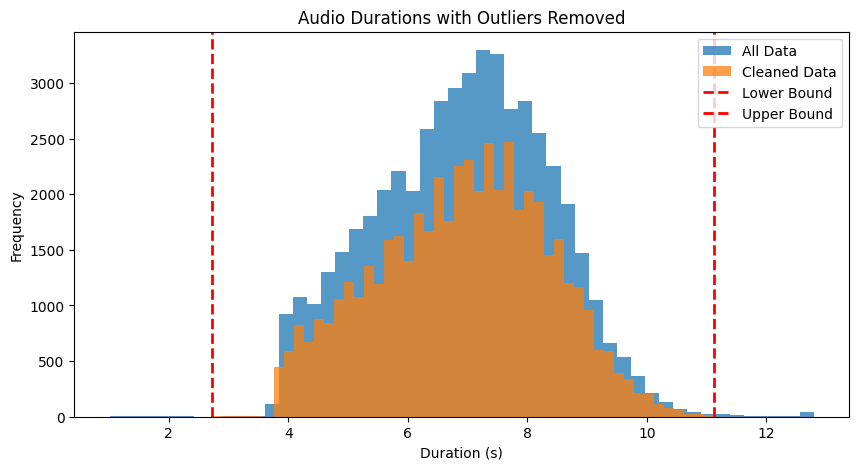

In [6]:
# Calculate the IQR
Q1 = audio_df['duration'].quantile(0.25)
Q3 = audio_df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = audio_df[(audio_df['duration'] < lower_bound) | (audio_df['duration'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# Remove outliers from the dataset
clean_audio_df = audio_df[(audio_df['duration'] >= lower_bound) & (audio_df['duration'] <= upper_bound)]

# Display summary statistics for cleaned data
print(clean_audio_df.describe())

# Plot durations with outliers highlighted
plt.figure(figsize=(10, 5))
plt.hist(audio_df['duration'], bins=50, alpha=0.75, label='All Data')
plt.hist(clean_audio_df['duration'], bins=50, alpha=0.75, label='Cleaned Data')
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2, label='Lower Bound')
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2, label='Upper Bound')
plt.legend()
plt.title('Audio Durations with Outliers Removed')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency')
plt.show()


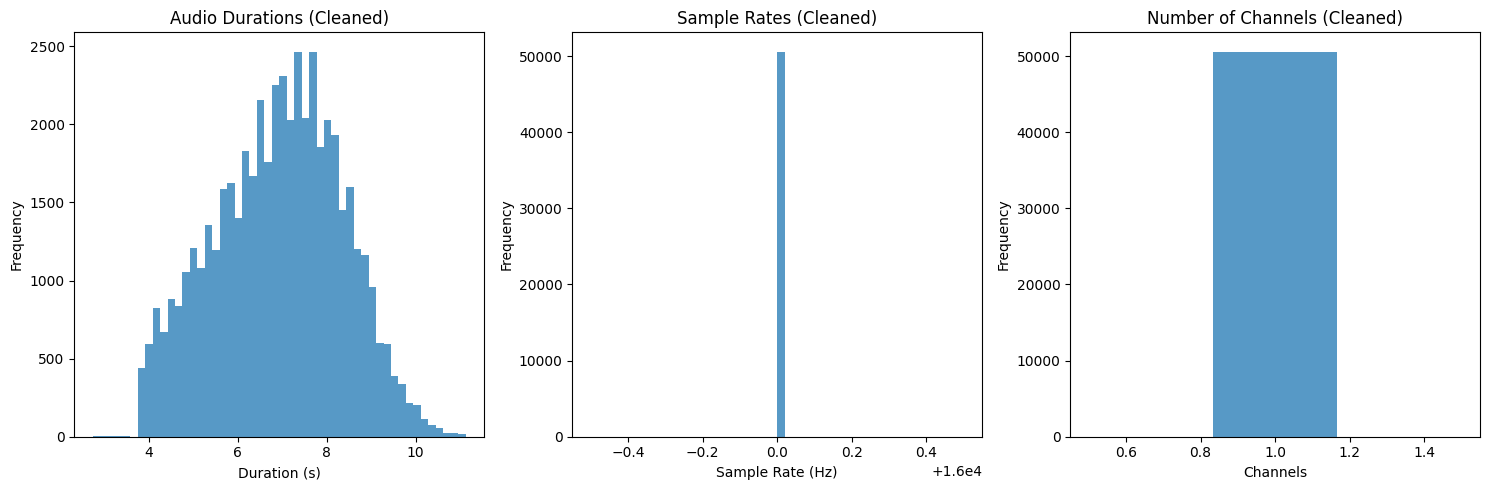

In [7]:
# Analysis of cleaned data
durations_clean = clean_audio_df['duration'].values
sample_rates_clean = clean_audio_df['sample_rate'].values
channels_clean = clean_audio_df['channels'].values

# Plot distributions of cleaned dataset
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(durations_clean, bins=50, alpha=0.75)
plt.title('Audio Durations (Cleaned)')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(sample_rates_clean, bins=50, alpha=0.75)
plt.title('Sample Rates (Cleaned)')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(channels_clean, bins=3, alpha=0.75)
plt.title('Number of Channels (Cleaned)')
plt.xlabel('Channels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [10]:
# Function to detect silence in an audio file
def detect_silence(audio, sr, threshold=20):
    intervals = librosa.effects.split(audio, top_db=threshold)
    return intervals

# Initialize list for silent intervals
silent_intervals = []

# Detect silent intervals in audio files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for audio_file in zip_ref.namelist():
        if audio_file.startswith('train/') and audio_file.endswith('.wav'):
            with zip_ref.open(audio_file) as file:
                y, sr = librosa.load(file, sr=None, mono=True)
                intervals = detect_silence(y, sr)
                silent_intervals.append(intervals)

# Analyze silent intervals
print("Number of files with silence:", sum(len(i) > 0 for i in silent_intervals))


Number of files with silence: 50715


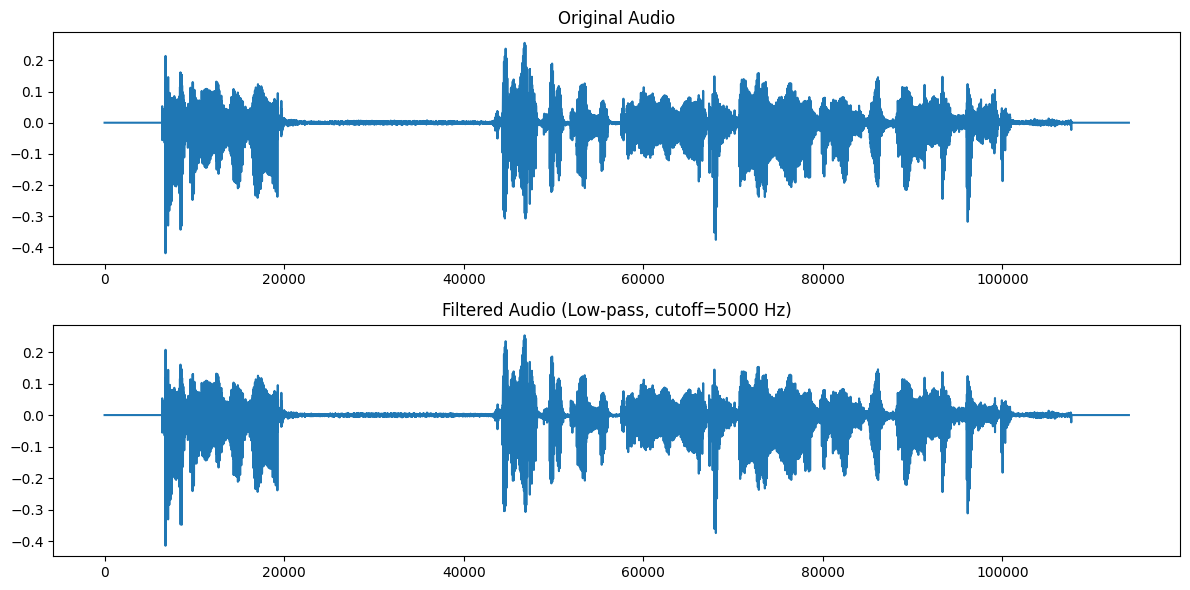

In [12]:
from scipy.signal import butter, lfilter

# Define filter functions
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_filter(data, fs, filter_type='low', cutoff=5000, order=5):
    if filter_type == 'low':
        b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Apply low-pass filter to an example audio clip
example_audio = None
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    example_audio = next((f for f in zip_ref.namelist() if f.startswith('train/') and f.endswith('.wav')), None)
    if example_audio:
        with zip_ref.open(example_audio) as file:
            y, sr = librosa.load(file, sr=None, mono=True)
            filtered_audio = apply_filter(y, sr, filter_type='low', cutoff=5000)

# Plot original and filtered audio
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Original Audio')
plt.subplot(2, 1, 2)
plt.plot(filtered_audio)
plt.title('Filtered Audio (Low-pass, cutoff=5000 Hz)')
plt.tight_layout()
plt.show()


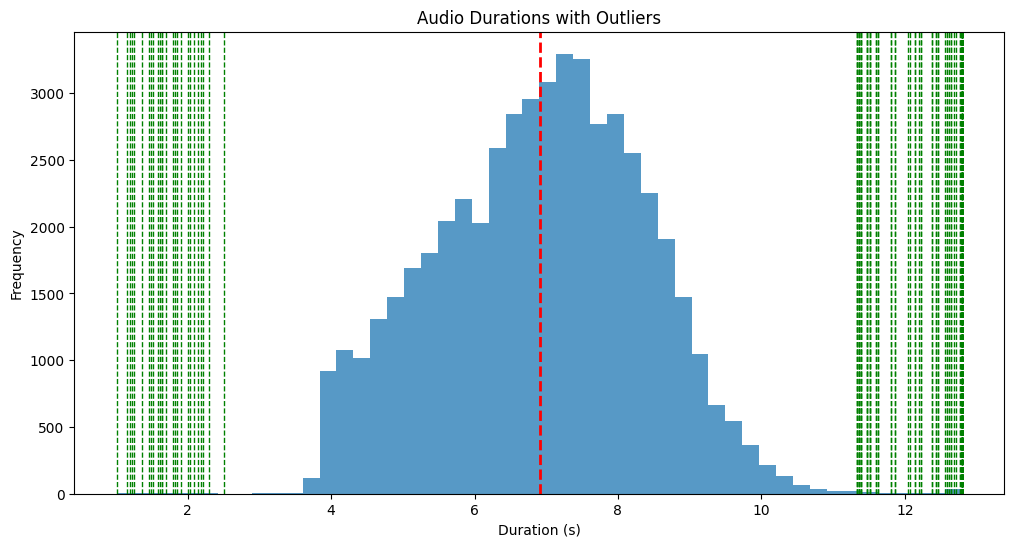

Number of outliers: 102
Outlier durations: [12.59, 12.8, 12.59, 2.3, 1.37, 1.7, 1.79, 12.8, 12.8, 12.8, 2.03, 1.52, 1.16, 11.51, 12.65, 12.38, 1.58, 1.46, 12.05, 1.91, 2.51, 11.36, 2.09, 12.08, 12.47, 12.44, 11.6, 12.23, 12.71, 11.36, 1.01, 12.8, 1.49, 11.81, 2.15, 12.23, 12.8, 12.8, 12.8, 12.8, 12.14, 12.68, 11.48, 12.8, 1.25, 12.8, 12.8, 1.85, 2.21, 12.14, 1.64, 11.6, 11.87, 12.8, 11.51, 11.36, 1.64, 12.8, 11.63, 11.33, 12.8, 11.48, 12.8, 12.8, 12.8, 12.8, 2.0, 12.8, 12.2, 11.39, 11.39, 12.8, 12.8, 12.8, 1.19, 11.33, 12.38, 12.56, 1.22, 11.51, 12.8, 11.63, 12.77, 12.8, 11.36, 12.62, 12.77, 12.44, 11.48, 12.47, 12.8, 12.8, 2.18, 11.39, 1.82, 1.61, 11.81, 12.8, 12.8, 11.33, 12.65, 11.87]


In [13]:
# Identify outliers in durations
duration_mean = np.mean(durations)
duration_std = np.std(durations)
outliers = [d for d in durations if np.abs(d - duration_mean) > 3 * duration_std]

# Visualize outliers
plt.figure(figsize=(12, 6))
plt.hist(durations, bins=50, alpha=0.75)
plt.axvline(duration_mean, color='r', linestyle='dashed', linewidth=2)
for outlier in outliers:
    plt.axvline(outlier, color='g', linestyle='dashed', linewidth=1)
plt.title('Audio Durations with Outliers')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency')
plt.show()

print("Number of outliers:", len(outliers))
print("Outlier durations:", outliers)
